# CHAPTER 06 머신러닝, 딥러닝 기초 이론

## 3. 선형/로지스틱 회귀


In [1]:
import numpy as np
import os
np.random.seed(10)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## 3.1 선형 회귀
### 3.1.1 정규 방정식

잡음이 섞인 선형 데이터

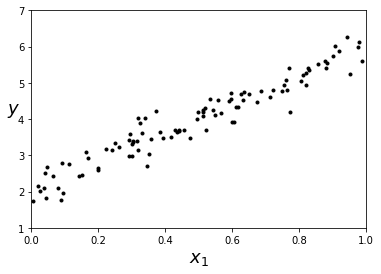

In [2]:
X = np.random.rand(100,1)
y =  4 * X +  2 + 0.3* np.random.randn(100, 1)

def plot_data(X, y, axis=None):
    plt.plot(X, y, 'k.')
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    if axis is not None:
        plt.axis(axis)
plot_data(X, y, [0, 1, 1, 7])

**정규 방정식 수식을 이용하여 모델 생성하기**

In [3]:
X_b = np.hstack((np.ones((100,1)), X)) # 편향에 대응하는 입력값 추가

정규방정식을 이용한 가중치, 편향 계산

In [4]:
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w

array([[2.07489074],
       [3.89044065]])

정규 방정식을 이용한 선형 회귀 모델

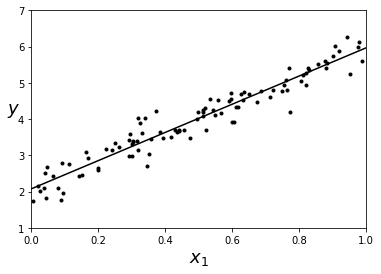

In [5]:
X_new = [[0], [1]]
X_new_b = np.hstack((np.ones((2,1)), X_new))
y_pred = X_new_b.dot(w)

plot_data(X, y, [0, 1, 1, 7])
plt.plot(X_new, y_pred, 'k')

**사이킷런의 `LinearRegression` 이용하여 모델 생성하기**

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([2.07489074]), array([[3.89044065]]))

### 3.1.2 경사 하강법

비용 함수 도시

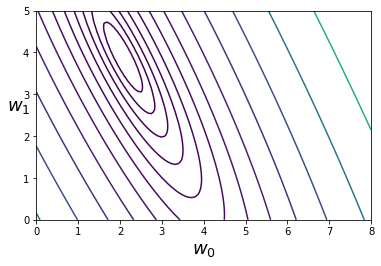

In [7]:
def plot_cost(x):
    w0s = np.linspace(0, 8, 100)
    w1s = np.linspace(0, 5, 100)
    m = 100
    cost = np.zeros((100, 100))
    for i, w0 in enumerate(w0s):
        for j, w1 in enumerate(w1s):
            w = [[w0], [w1]]
            cost[i, j] = 2/m * (x.dot(w) - y).T.dot(x.dot(w) - y)

    V = np.logspace(np.log10(np.min(cost)), np.log10(np.max(cost)),14)

    plt.contour(w0s,w1s,cost.T,V)
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$", fontsize=18)
    plt.ylabel("$w_1$",  rotation=0, fontsize=18)

plot_cost(X_b)



식 (3.10)을 이용한 경사 하강법

In [8]:
learning_rate = 0.1
n_iter = 800
m = len(X_b)

W = np.array([[0.1], [0.2]])
Ws = []
Ws.append(W)
gradients = []

for iteration in range(n_iter):
    gradient = 2/m * X_b.T.dot(X_b.dot(W) - y) 
    gradients.append(gradient)
    W = W - learning_rate * gradient
    Ws.append(W)
W

array([[2.07495538],
       [3.89031551]])

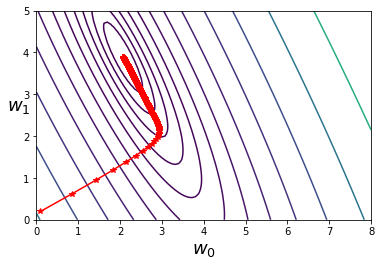

In [9]:
plot_cost(X_b)
Ws = np.array(Ws)
plt.plot(Ws[:,0], Ws[:,1], 'r-*')

**그래디언트의 방향**

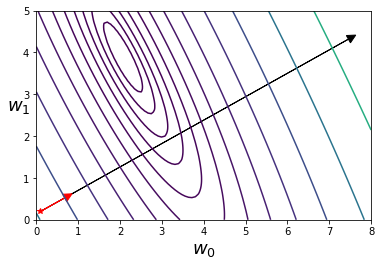

In [10]:
W0_fst = Ws[0,0,0]             
W1_fst = Ws[0,1,0]
grad0_fst = gradients[0][0][0]
grad1_fst = gradients[0][1][0]

plot_cost(X_b)
plt.plot(W0_fst, W1_fst, 'r*')
plt.arrow(W0_fst, W1_fst, -grad0_fst, -grad1_fst,
          head_width=0.2, head_length=0.2, fc='k', ec='k', length_includes_head=True)
plt.arrow(W0_fst, W1_fst, -learning_rate*grad0_fst, -learning_rate*grad1_fst, 
          head_width=0.2, head_length=0.2, fc='r', ec='r', length_includes_head=True)

### `StandardScaler` 적용

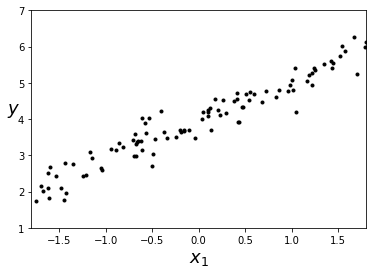

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_b = np.hstack((np.ones((100,1)), X_scaled))

plot_data(X_scaled, y, [-1.8, 1.8, 1, 7])

In [12]:
np.random.seed(3)

learning_rate = 0.1
n_iter = 100
m = 100
Ws = []
W = [[0.1], [0.2]]
Ws.append(W)
for iteration in range(n_iter):
    gradients = 2/m * X_scaled_b.T.dot(X_scaled_b.dot(W) - y)
    W = W - learning_rate * gradients
    Ws.append(W)


(0, 5)

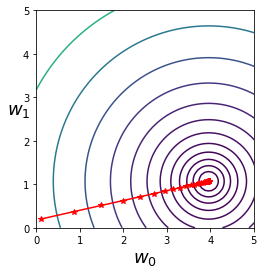

In [13]:
plot_cost(X_scaled_b)
Ws = np.array(Ws)
plt.plot(Ws[:,0], Ws[:,1], 'r-*')
plt.xlim([0,5])

### 3.1.3 확률적 경사 하강법과 미니 배치 경사 하강법

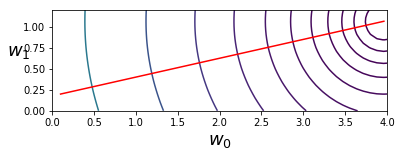

epoch=100, w0=3.963, w1=1.070


In [14]:
# batch_size = 1      #확률적 경사 하강법
# batch_size = 10     #미니 배치 경사 하강법
batch_size = 100    #배치 경사 하강법

np.random.seed(3)
n_samples = len(X_scaled_b)
learning_rate = 0.1
n_epochs = 100

m = 100
Ws = []
W = [[0.1], [0.2]]
Ws.append(W)
n_samples = X_scaled_b.shape[0]

def fetch_batch(batch_size, iteration, epoch):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration*batch_size:(iteration+1)*batch_size]
    return X_scaled_b[batch_indices, :], y[batch_indices, :]

for epoch in range(n_epochs):
    for iteration in range(n_samples // batch_size):
        X_batch, y_batch = fetch_batch(batch_size, iteration, epoch)
        gradients = 2/m * X_batch.T.dot(X_batch.dot(W) - y_batch)
        W = W - learning_rate * gradients
        Ws.append(W)

Ws = np.array(Ws)
plot_cost(X_scaled_b)
plt.plot(Ws[:,0], Ws[:,1], 'r-')
plt.axis([0, 4, 0, 1.2])
plt.show()

print('epoch={0:}, w0={1:.3f}, w1={2:.3f}'.format(n_epochs, Ws[-1,0,0],Ws[-1,1,0]))

**`SGDRegressor`를 이용한 확률적 경사 하강법**

In [15]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=100, penalty=None, learning_rate='constant', eta0=0.1)
model.fit(X_scaled, y.ravel())
model.intercept_, model.coef_

(array([3.95183889]), array([1.22175738]))

**`SGDRegressor`를 이용한 미니 배치 경사 하강법**

In [16]:
model_minibatch = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', eta0=0.1)

batch_size = 10
def fetch_batch(batch_size, iteration, epoch):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration*batch_size:(iteration+1)*batch_size]
    return X_scaled[batch_indices, :], y[batch_indices, :]

n_epochs=10
for epoch in range(n_epochs):
    for iteration in range(n_samples // batch_size):
        X_batch, y_batch = fetch_batch(batch_size, iteration, epoch)
        model_minibatch.partial_fit(X_batch, y_batch.ravel())
        
model_minibatch.intercept_, model_minibatch.coef_

(array([4.0453851]), array([0.97607903]))

**`Pipeline`을 이용 `StandardScaler`와 `SGDRegressor` 통합**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
sgd_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', eta0=0.1)),       
    ])
sgd_pipeline.fit(X, y.ravel())

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False))])

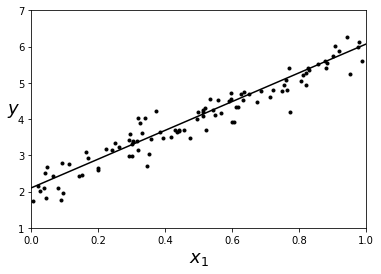

In [18]:
X_new = np.linspace(0, 1, 100).reshape(-1,1)
y_new = sgd_pipeline.predict(X_new)

plot_data(X, y, [0, 1, 1, 7])
plt.plot(X_new, y_new, 'k')

## 3.1.4 다항 회귀

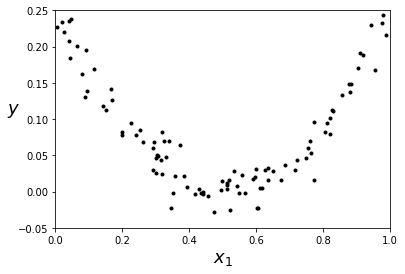

In [19]:
np.random.seed(10)
m = 100
X = np.random.rand(m,1)
y =  (X-0.5)**2 + 0.02* np.random.randn(m, 1)

plot_data(X, y, [0, 1, -0.05, 0.25])

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([0.0894402]), array([[-0.02506583]]))

**선형 회귀**

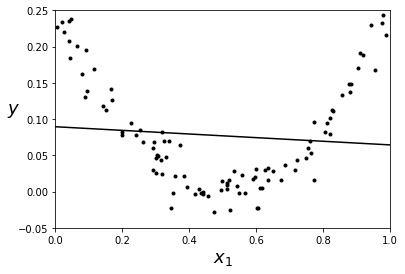

In [21]:
X_new = [[0], [1]]
X_new_b = np.hstack((np.ones((2,1)), X_new))
y_pred = model.predict(X_new)

plot_data(X, y, [0, 1, -0.05, 0.25])
plt.plot(X_new, y_pred, 'k')

**제곱항을 추가한 다항 회귀**

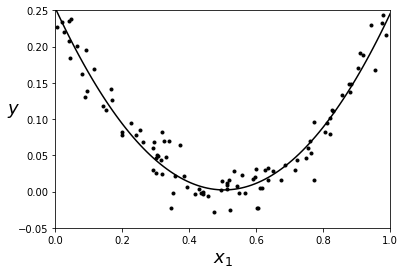

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_poly = np.hstack((X, X**2))
model.fit(X_poly, y)

X_new = np.linspace(0, 1, 100).reshape(-1,1)
X_poly_new = np.hstack((X_new, X_new**2))
y_poly_new = model.predict(X_poly_new)

plot_data(X, y, [0, 1, -0.05, 0.25])
plt.plot(X_new, y_poly_new, 'k')

**`PolynomialFeatures`를 이용한 다항 회귀**

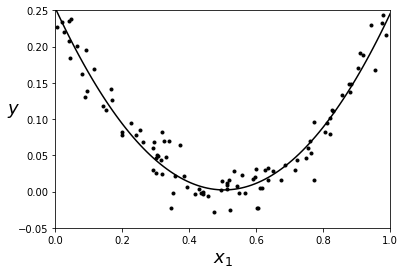

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
model.fit(X_poly, y)

X_new = np.linspace(0, 1, 100).reshape(-1,1)
X_poly_new =poly_features.transform(X_new)
y_poly_new = model.predict(X_poly_new)

plot_data(X, y, [0, 1, -0.05, 0.25])
plt.plot(X_new, y_poly_new, 'k')

## 3.1.5 과소적합과 과대적합

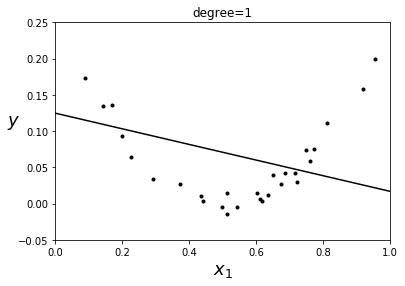

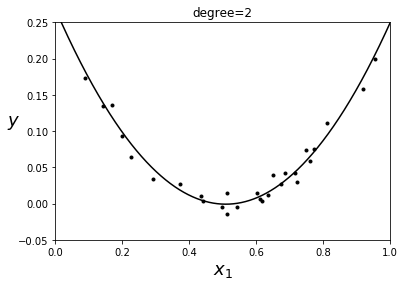

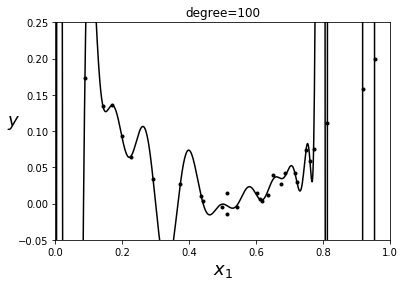

In [24]:
np.random.seed(10)
m = 30
X = np.random.rand(m,1)
y =  (X-0.5)**2 + 0.02* np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 100]

for i, degree in enumerate(degrees):
    model = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree, include_bias=False) 
    X_poly = poly_features.fit_transform(X)
    model.fit(X_poly, y)

    X_new = np.linspace(0, 1, 1000).reshape(-1,1)
    X_poly_new =poly_features.transform(X_new)
    y_pred = model.predict(X_poly_new)
    
    plt.figure()
    plot_data(X, y, [0, 1, -0.05, 0.25])
    plt.plot(X_new, y_pred, 'k')
    plt.title('degree={}'.format(degree))


## 3.1.7 L1/L2 규제화

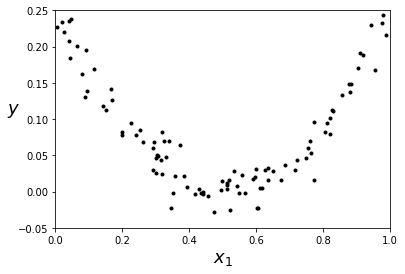

In [25]:
np.random.seed(10)
m = 100
X = np.random.rand(m,1)
y =  (X-0.5)**2 + 0.02* np.random.randn(m, 1)

plot_data(X, y, [0, 1, -0.05, 0.25])

**릿지 회귀**

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

from sklearn.linear_model import SGDRegressor
ridge = SGDRegressor(max_iter=2000, penalty='l2', learning_rate='constant', eta0=0.1)
ridge.fit(X_poly, y.ravel())
ridge.coef_

array([-0.70186648,  0.28370586,  0.31800698,  0.18177888,  0.07217247,
        0.01030306, -0.01877884, -0.03134747, -0.03838528, -0.04593464])

**라쏘 회귀**

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

from sklearn.linear_model import SGDRegressor
lasso = SGDRegressor(max_iter=2000, penalty='l1', learning_rate='constant', eta0=0.1)
lasso.fit(X_poly, y.ravel())
lasso.coef_

array([-0.65142217,  0.11175238,  0.60763575,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.03997598])

**`train_test_split()`을 이용한 과대적합을 완화하는 모델 찾기**

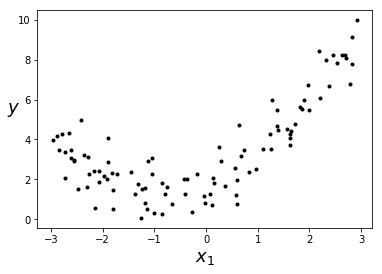

In [28]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

plot_data(X, y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50], test_size=0.5, random_state=10)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [31]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1,
                   penalty=None,                       
                   eta0=0.0005,
                   warm_start=True,
                   learning_rate="constant",
                   random_state=42)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty='l1',
                       alpha=0.02,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

In [32]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error

n_epochs = 1000
train_errors, val_errors = [], []
minimum_val_error = float("inf") 
for epoch in range(n_epochs):
    sgd.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd.predict(X_train_poly_scaled)    
    y_val_predict = sgd.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))    
    val_error = mean_squared_error(y_val_predict, y_val)

    if val_error < minimum_val_error:
        minimum_val_error = val_error 
        best_model = deepcopy(sgd)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])     

train_errors_reg, val_errors_reg = [], []
minimum_val_error_reg = float("inf")
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict_reg = sgd_reg.predict(X_train_poly_scaled)    
    y_val_predict_reg = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors_reg.append(mean_squared_error(y_train_predict_reg, y_train))
    val_errors_reg.append(mean_squared_error(y_val_predict_reg, y_val))    
    val_error_reg = mean_squared_error(y_val_predict_reg, y_val)

    if val_error_reg < minimum_val_error_reg:
        minimum_val_error_reg = val_error_reg 
        best_model_reg = deepcopy(sgd_reg)
        
best_epoch_reg = np.argmin(val_errors_reg)
best_val_rmse_reg = np.sqrt(val_errors_reg[best_epoch_reg])


C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'MSE')

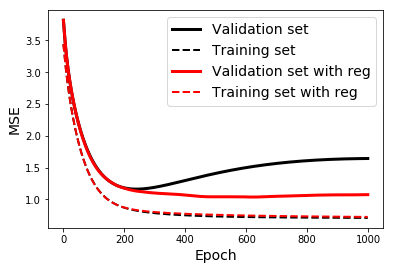

In [33]:
plt.plot(np.sqrt(val_errors), "k-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "k--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_reg), "r-", linewidth=3, label="Validation set with reg")
plt.plot(np.sqrt(train_errors_reg), "r--", linewidth=2, label="Training set with reg")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE", fontsize=14)

# 3.2 로지스틱 회귀

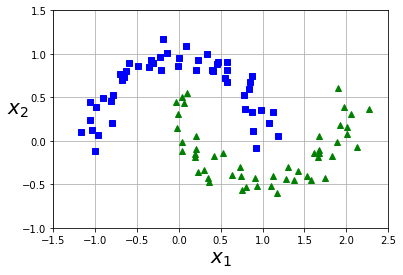

In [34]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

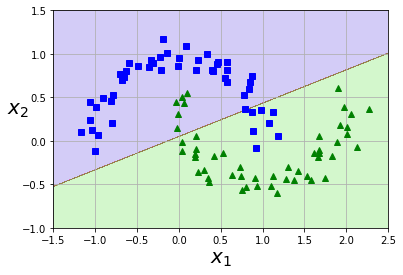

In [36]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]    
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(model, [-1.5, 2.5, -1, 1.5])

**다항 로지스틱 회귀**

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly =poly_features.fit_transform(X)
model = LogisticRegression()
model.fit(X_poly, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Pipeline 적용**

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_std_model = Pipeline([
        ("Poly", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(C=1e3))
    ])
poly_std_model.fit(X,y)

Pipeline(memory=None,
     steps=[('Poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

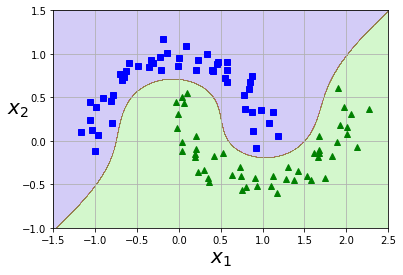

In [39]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_std_model, [-1.5, 2.5, -1, 1.5])

## 3.2.2 소프트맥스 로지스틱 회귀
## 3.2.3 크로스 엔트로피

In [40]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                           random_state=20, n_clusters_per_class=1)

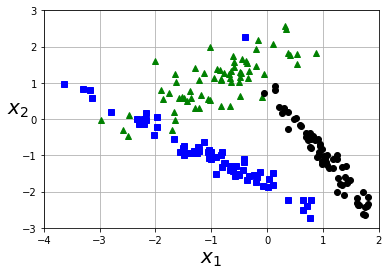

In [41]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ko")
    
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-4, 2, -3, 3])
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1)
softmax_reg.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

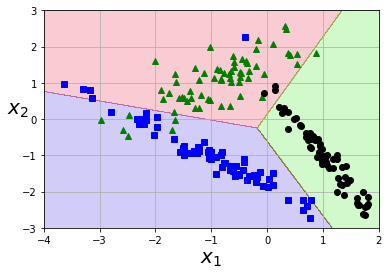

In [43]:
plot_dataset(X, y, [-4, 2, -3, 3])
plot_predictions(softmax_reg, [-4, 2, -3, 3])

**다항 소프트맥스 회귀**

In [44]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_std_model = Pipeline([
        ("Poly", PolynomialFeatures(degree=5)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1))
    ])
poly_std_model.fit(X,y)

Pipeline(memory=None,
     steps=[('Poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

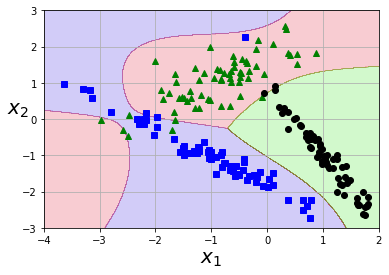

In [45]:
plot_dataset(X, y, [-4, 2, -3, 3])
plot_predictions(poly_std_model, [-4, 2, -3, 3])